## Download data
This section is dedicated to setting up the environment for downloading the necessary data. It outlines the goal of the subsequent code blocks, which is to obtain and prepare the data required for analysis.

This cell imports all the necessary libraries and modules for the notebook. It includes common data manipulation libraries such as `numpy` and `pandas`, data visualization library `matplotlib`, financial data download library `yfinance`, and other utility libraries. These imports set the foundation for data handling, analysis, and visualization tasks in the notebook.

In [1]:
import os
import sys
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from scipy.stats import t, norm
import random

This code snippet is designed to download and save intraday stock data for a list of specified stocks over a given date range. The process is broken down into several key steps:

1. **Function Definition (`download_intraday_data`)**: This function takes in three parameters: the stock symbol (`stock`), the start date (`start_date`), and the end date (`end_date`). It initializes an empty DataFrame to collect all the downloaded data. Then, it iterates through the date range in weekly intervals (to comply with potential API limits), downloading the stock data for each interval using the `yf.download` function from the `yfinance` library. The data for each interval is concatenated to the `all_data` DataFrame, which is returned at the end of the function.

2. **Stock Symbols**: A list of stock symbols (e.g., "GOOGL", "AAPL", "AMZN", "TSLA", "MSFT", "NVDA") is defined. These represent the stocks for which the intraday data will be downloaded.

3. **Date Range**: The start and end dates for the data download are specified. In this example, the date range is from March 1, 2024, to March 24, 2024. It's noted that these dates should be adjusted to reflect the last full week available when running the code.

4. **Data Download and Save**: For each stock in the list, the script prints a message indicating the start of the download process for that stock. It then calls the `download_intraday_data` function to download the data within the specified date range. Finally, the downloaded data is saved to a CSV file named after the stock and the specified month ("_march_2024_intraday.csv").

This script efficiently automates the process of downloading and saving intraday trading data for multiple stocks, making it a valuable tool for financial analysis and research.

In [5]:
def download_intraday_data(stock, start_date, end_date):
    all_data = pd.DataFrame()
    current_date = start_date

    while current_date < end_date:
        week_later = current_date + timedelta(days=7)
        # Ensure end date is not beyond the overall end date
        if week_later > end_date:
            week_later = end_date
        data = yf.download(tickers=stock, start=current_date, end=week_later, interval="1m")
        all_data = pd.concat([all_data, data])
        current_date = week_later
    return all_data

# Define the stock symbols
stocks = ["GOOGL", "AAPL", "AMZN", "TSLA", "MSFT", "NVDA"]

# Define your start and end dates for the last full week available
start_date = datetime(2024, 3, 1)
end_date = datetime(2024, 3, 24)

# Adjust these dates to the last full week available when you run the code

# Download the data for each stock
for stock in stocks:
    print(f"Downloading data for {stock}")
    stock_data = download_intraday_data(stock, start_date, end_date)
    # Save to CSV
    stock_data.to_csv(f"{stock}_march_2024_intraday.csv")


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [7]:
GOOGL = pd.read_csv("GOOGL_march_2024_intraday.csv")
GOOGL.head()

,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2024-03-01 09:30:00-05:00,138.404999,138.695007,138.139999,138.160004,138.160004,742632
1,2024-03-01 09:31:00-05:00,138.169998,138.524994,138.029999,138.524994,138.524994,82563
2,2024-03-01 09:32:00-05:00,138.529999,138.610001,138.339996,138.380005,138.380005,91254
3,2024-03-01 09:33:00-05:00,138.350006,138.710007,138.289993,138.350006,138.350006,108676
4,2024-03-01 09:34:00-05:00,138.330002,138.449997,138.270004,138.300003,138.300003,57478


The `Agent` class represents participants in the market, with properties that define their position in a grid, the time and price of their bid, and their active status. Each agent has an intrinsic value (`Si`) indicating whether they are buying (1) or selling (-1), and a coefficient (`Ci`) representing their trading strategy (fundamentalist with 1, or noise trader with -1). The class initializes agents with their respective attributes, facilitating the simulation of diverse trading behaviors.

The `Market` class encapsulates the entire trading environment, including a grid of agents, market parameters, and mechanisms for simulating trading activity. It defines several key attributes, such as the size of the grid (`N`), interaction strength (`J`), and various parameters (`alpha`, `beta`, `a`, `b`) influencing the agents' trading decisions and the dynamics of price movements. The class provides methods for initializing agents with random attributes, simulating trading activities, updating agent states and market prices based on trading outcomes, and calculating key market metrics like magnetization and Hamiltonian.

In [157]:
class Agent:
    def __init__(self, i, j, time, price, Si, Ci):
        self.i = i  # Agent's row index in the grid
        self.j = j  # Agent's column index in the grid
        self.time = time  # Time of the agent's bid
        self.price = price  # Price of the agent's bid
        self.active = True  # Whether the agent will place an order in the next interval
        self.Si = Si
        self.Ci = Ci


class Market:
    def __init__(self, N, J=1, alpha=0.1, beta=1.45, a=0.1, b=0.1, p_star=100, mu_init=100):
        self.N = N  # Size of one side of the square grid
        self.J = J  # Interaction strength
        self.alpha = alpha  # Coupling coefficient
        self.beta = beta
        self.a = a  # Response strength of fundamentalists
        self.b = b  # Response strength of noise traders
        self.p_star = p_star  # Assumed fair price
        self.grid = [[None for _ in range(N)] for _ in range(N)]  # Initialize the grid with None
        self.previous_price = p_star  # Initialize with a base price
        self.mu_init = mu_init


    def init_agents(self):
        for i in range(self.N):
            for j in range(self.N):
                initial_time = int(np.ceil(np.random.exponential(scale=2) / 0.125))
                
                # Determine if the agent is a buyer or seller
                is_buyer = np.random.choice([True, False])
                is_noise = np.random.choice([True, False])
                
                if is_buyer:
                    mu = self.mu_init * 0.995
                    S_i = 1
                else:
                    mu = self.mu_init * 1.005
                    S_i = -1

                C_i = -1 if is_noise else 1
                sigma = self.mu_init * 0.01
                    
                initial_price = np.random.normal(mu, sigma)
                self.grid[i][j] = Agent(i, j, initial_time, initial_price, S_i, C_i)


    def populate_agents(self):
        for i in range(self.N):
            for j in range(self.N):
                if self.grid[i][j].active:
                    self.grid[i][j].time = int(np.ceil(np.random.exponential(scale=2) / 0.125))
                else:
                    self.grid[i][j].time = 0
                
                # Determine if the agent is a buyer or seller
                is_buyer = self.grid[i][j].price > 0
                is_noise = self.grid[i][j].Ci < 0
                
                if is_buyer:
                    mu = self.mu_init * 0.995
                    self.grid[i][j].S_i = 1
                else:
                    mu = self.mu_init * 1.005
                    self.grid[i][j].S_i = -1

                self.grid[i][j].C_i = -1 if is_noise else 1
                sigma = self.mu_init * 0.01
                    
                price = np.random.normal(mu, sigma)
                self.grid[i][j].price = price if is_buyer else -price


    def update_agents(self, t):
        for i in range(self.N):
            for j in range(self.N):
                if self.grid[i][j] and self.grid[i][j].active:
                        
                    self.calculate_magnetization()
                    self.update_price(i, j)
                    
                    # Generate the waiting time from an exponential distribution
                    waiting_time = np.random.exponential(scale=2)
                    
                    # Convert the waiting time to the corresponding trading interval
                    next_interval = t + int(np.ceil(waiting_time) / 0.125)
                    
                    # Ensure the next interval does not exceed the total intervals
                    self.grid[i][j].time = next_interval

                    self.grid[i][j].active = False


    def update_market(self, t):
        # Sort buyers and sellers based on price priority
        buyers = [(self.grid[i][j].price, i, j) for i in range(self.N) for j in range(self.N) \
                  if self.grid[i][j].price >= 0 and self.grid[i][j].time <= t and not self.grid[i][j].active]
        sellers = [(self.grid[i][j].price, i, j) for i in range(self.N) for j in range(self.N) \
                   if self.grid[i][j].price < 0 and self.grid[i][j].time <= t and not self.grid[i][j].active]
        
        buyers.sort(key=lambda x: x[0], reverse=True)
        sellers.sort(key=lambda x: abs(x[0]))

        transaction_price = None
        
        while buyers and sellers:
            buyer_price, buyer_i, buyer_j = buyers[0]
            seller_price, seller_i, seller_j = sellers[0]
            
            if buyer_price >= abs(seller_price):
                transaction_price = (buyer_price + abs(seller_price)) / 2
                buyers.pop(0)
                sellers.pop(0)
                self.grid[buyer_i][buyer_j].active = True
                self.grid[seller_i][seller_j].active = True
            else:
                break

        if not transaction_price is None:
            self.p_star = transaction_price


    def is_valid_pos(self, i, j):
        return 0 <= i < self.N and 0 <= j < self.N
    
    
    def calculate_magnetization(self):
        # Calculate the market magnetization M(t)
        self.M = sum(agent.Si for row in self.grid for agent in row if agent) / self.N**2

    
    def calculate_hamiltonian(self, i, j):
        h = 0
        # Sum the influences of neighboring agents for the Hamiltonian
        for di, dj in [(-1, 0), (0, -1), (1, 0), (0, 1)]:  # Neighbors
            ni, nj = (i + di), (j + dj)
            if self.is_valid_pos(ni, nj):
                h += self.grid[ni][nj].Si * self.J

        h -= self.alpha * self.grid[i][j].Ci * self.M
        return h
    

    def update_Si(self, i, j):
        h_i = self.calculate_hamiltonian(i, j)
        q = 1 / (1 + np.exp(-2 * h_i * self.beta))
        random_number = random.random()
        self.grid[i][j].Si = 1 if random_number <= q else -1


    def update_Ci(self, i, j):
        if self.grid[i][j].Si * self.grid[i][j].Ci * self.M < 0:
            self.grid[i][j].Ci = -self.grid[i][j].Ci


    def update_price(self, i, j):

        Delta_1 = 1 if self.grid[i][j].price >= self.p_star and self.grid[i][j].price >= 0 else 0
        Delta_2 = 1 if self.grid[i][j].price < self.p_star and self.grid[i][j].price >= 0 else 0
        Delta_3 = 1 if self.grid[i][j].price >= self.p_star and self.grid[i][j].price < 0 else 0
        Delta_4 = 1 if self.grid[i][j].price < self.p_star and self.grid[i][j].price < 0 else 0
        Delta = np.array([Delta_1, Delta_2, Delta_3, Delta_4])
        h_n = Delta * 4 * self.J - self.alpha * abs(self.M) * (self.M * (self.N ** 2))
        probabilities = np.exp(-self.beta * h_n)
        probabilities /= probabilities.sum()  # Normalize probabilities
        probabilities = np.cumsum(probabilities)

        # Implementing the probability distribution for price updates
        deltas = np.random.exponential(scale=1, size=4)

        random_number = random.random()
        if random_number <= probabilities[0]:
            self.grid[i][j].price = min(self.p_star + deltas[0], self.previous_price * 1.1)
        elif random_number <= probabilities[1]:
            self.grid[i][j].price = min(self.p_star - deltas[1], self.previous_price * 1.1)
        elif random_number <= probabilities[2]:
            self.grid[i][j].price = -max(self.p_star - deltas[2], self.previous_price * 0.9)
        else:
            self.grid[i][j].price = -max(self.p_star + deltas[3], self.previous_price * 0.9)


    # def calculate_local_field(self, i, j):
    #     neighbors = self.get_neighbor_states(i, j)
    #     M = self.calculate_magnetization()
    #     # Simplification of Hamiltonian for neighbor interaction - alpha * M
    #     h_i = sum(neighbors) * self.J - self.alpha * (self.grid[i][j].price > 0) * abs(M)
    #     return h_i

    # def calculate_price(self):
    #     # Calculate the new price based on fundamentalist and noise trader demands
    #     M = self.calculate_magnetization()
    #     x_F = self.a * np.log(self.p_star) / np.log(M)  # Simplified for demonstration
    #     x_I = self.b * M
    #     # Simplified equation to demonstrate the concept
    #     new_price = self.p_star * np.exp((x_F + x_I) / (self.a * self.N**2))
    #     return new_price
    
    # def calculate_stock_return(self, a, b, m, n, p_star):
    #     """
    #     Calculate the stock return based on the Bornholdt-Kaizoji-Fujiwara model.
    #     """
    #     # Calculate the new magnetization
    #     M_new = self.calculate_magnetization()
    #     M_old = self.magnetizations[-1]
    #     self.magnetizations.append(M_new)

    #     # Calculate mu (μ) constant
    #     mu = (b * n) / (a * m)

    #     # Calculate the return rate r_l(t) based on the model
    #     r_l = mu * (M_new - M_old)

    #     # Update the previous and current prices
    #     self.previous_price = self.p_star
    #     self.p_star *= np.exp(r_l)

    #     return r_l

The `simulate_trading` function orchestrates the entire market simulation over a specified number of days. It initializes agents, simulates trading activities for each day, updates market conditions, and collects data on transaction prices and return rates. This function showcases how individual agent decisions aggregate to shape market dynamics and price movements.

In [ ]:
def simulate_trading(market, days=130, times=480):
    """
    Simulate trading for a specified number of days using the Bornholdt-Kaizoji-Fujiwara model.
    
    :param market: An instance of the Market class.
    :param days: Number of trading days to simulate.
    :param initial_time_range: Tuple specifying the range of initial times for agents to place their first order.
    :param initial_price_range: Tuple specifying the range of initial prices for agents.
    :return: A dictionary containing the return rates and stock prices for each trading day.
    """
    results = {
        'return_rates': [],
        'stock_prices': []
    }

    transaction_price_dict = {}
    transaction_return_dict = {}
    
    # Initialize agents for day 1
    market.init_agents()
    last_p_star = market.p_star
    up_down_days = 0

    for day in range(1, days + 1):
        print(f"Day {day}:")

        transaction_price_dict[day] = []
        transaction_return_dict[day] = []
        
        # Simulate each trading interval in the day
        for t in range(1, times + 1):
            # Here you'd implement the logic for matching orders and executing transactions
            # For simplicity, this example assumes transaction_prices are updated elsewhere
            market.update_agents(t)

            # Potentially, you update the market based on transactions and other factors
            market.update_market(t)  # Example beta value

            if market.p_star != market.previous_price:
                # print(f"Time {t}: Transaction Price: {market.p_star}")
                return_ = (market.p_star / market.previous_price - 1) * 100
                market.previous_price = market.p_star

                transaction_price_dict[day].append(market.p_star)
                transaction_return_dict[day].append(return_)

        if market.p_star >= last_p_star:
            if up_down_days >= 0:
                up_down_days += 1
            else:
                up_down_days = 1
            market.mu_init = market.p_star * 0.995 ** up_down_days
        else:
            if up_down_days <= 0:
                up_down_days -= 1
            else:
                up_down_days = -1
            market.mu_init = market.p_star * 1.025 ** abs(up_down_days)

        # Calculate stock return and update the price accordingly
        results['return_rates'].append(market.p_star / last_p_star - 1)
        results['stock_prices'].append(market.p_star)

        last_p_star = market.p_star

        market.populate_agents()
        
        # print(f"Return rate for day {day}: {return_rate}")
        print(f"Closing price for day {day}: {market.p_star}")
        
    print("Simulation complete.")
    return results, transaction_price_dict, transaction_return_dict

In [160]:
N = 20
J = 1
alpha = 0.1
beta = 1.45
a = 0.1
b = 0.1
p_star = 100
mu_init = 100
days = 130
times = 480

np.random.seed(1)
market = Market(N=N, J=J, alpha=alpha, beta=beta, a=a, b=b, p_star=p_star, mu_init=mu_init)
simulation_results, transaction_price_dict, transaction_return_dict = simulate_trading(market=market, days=days, times=times)

Day 1:
Closing price for day 1: 99.96101673535533
Day 2:
Closing price for day 2: 101.2841757805896
Day 3:
Closing price for day 3: 98.91965837209969
Day 4:
Closing price for day 4: 99.75737020253149
Day 5:
Closing price for day 5: 98.06095959406582
Day 6:
Closing price for day 6: 101.4874506592584
Day 7:
Closing price for day 7: 99.78854034513526
Day 8:
Closing price for day 8: 102.40992914551367
Day 9:
Closing price for day 9: 100.2705750898541
Day 10:
Closing price for day 10: 100.92132828590351
Day 11:
Closing price for day 11: 100.1383090054747
Day 12:
Closing price for day 12: 101.69613455571266
Day 13:
Closing price for day 13: 101.01608495966708
Day 14:
Closing price for day 14: 102.23662285595101
Day 15:
Closing price for day 15: 102.62111433366903
Day 16:
Closing price for day 16: 100.03310577928104
Day 17:
Closing price for day 17: 102.22047139600951
Day 18:
Closing price for day 18: 99.75307604290157
Day 19:
Closing price for day 19: 100.7197876116735
Day 20:
Closing price 

In [167]:
import json

# File path to save the dictionary
file_path = 'simulation_results.json'
file_path = 'transaction_price.json'
file_path = 'transaction_return.json'

# Save the dictionary to a file
with open(file_path, 'w') as f:
    # json.dump(simulation_results, f)
    # json.dump(transaction_price_dict, f)
    json.dump(transaction_return_dict, f)

In [131]:
import json

# File path where the dictionary is saved
file_path = 'simulation_results.json'
file_path = 'transaction_price.json'
file_path = 'transaction_return.json'

# Load the dictionary from the file
with open(file_path, 'r') as f:
    loaded_dict = json.load(f)

# Now 'loaded_dict' contains the dictionary loaded from the file
print(loaded_dict)


{'return_rates': [0, 0.011935156327012253, -0.019594576238434858, 0.0033790150060664104, -0.021158840832728565, 0.021507894988586518, -0.008496097808403769, 0.006491294398030645, -0.01695789430810979, 0.006443243088559258, -0.022478759268073745, -0.0005355236502804228, 0.02024628040994858, -0.001957711088199643, 0.019068013205817858, -0.022120850777220702, 0.022252989302617987, -0.01622644633736403, 0.004249373659400035, -0.015221992188377054, 0.018479370666512285, -0.023281602192361417, 0.005709203049273581, -0.0262546568080394, 0.042743441939546045, -0.024011559607044597, 0.02027953239611846, -0.015052418695741365, 0.010010367221962913, -0.007472453322068695, 0.009643333275365151, -0.01553893834418063, 0.015906600975294616, -0.017954570115567225, 0.013236301759387725, -0.009225463358343622, 0.00027381374718027374, -0.0018168484671796659, 0.012278162529554715, 0.008985001761231626, -0.01633351873771105, 0.008135825948319964, -0.015912808027722103, 0.01135064531420471, 0.00077860876222

## Plots

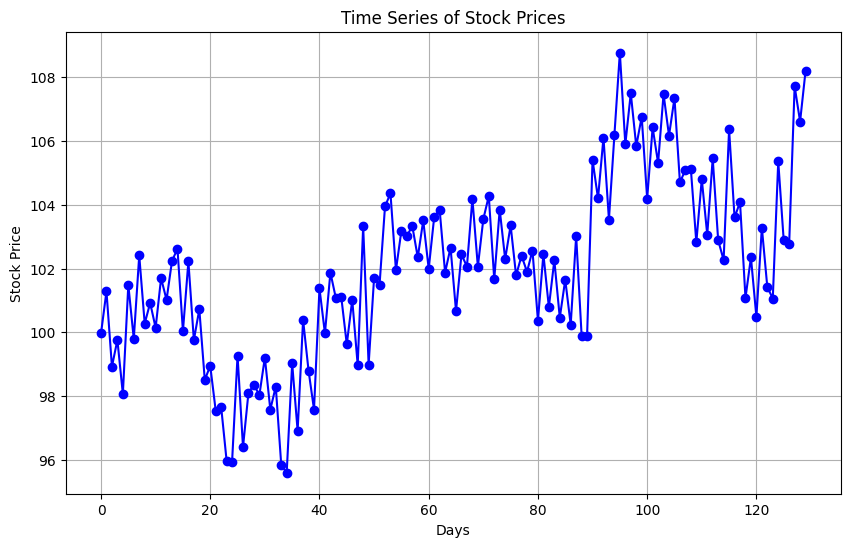

In [171]:
def plot_stock_prices(stock_prices):
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(stock_prices)), stock_prices, marker='o', linestyle='-', color='blue')
    plt.xlabel('Days')
    plt.ylabel('Stock Price')
    plt.title('Time Series of Stock Prices')
    plt.grid(True)
    plt.savefig("stock_price.png")
    plt.show()
    plt.close()


plot_stock_prices(simulation_results['stock_prices'])

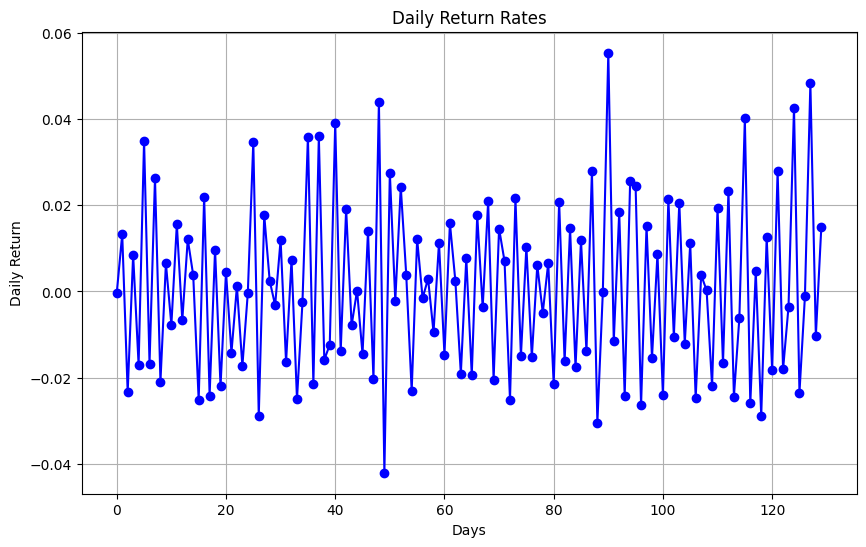

In [175]:
def plot_daily_returns(return_rates):
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(return_rates)), return_rates, marker='o', linestyle='-', color='blue')
    plt.xlabel('Days')
    plt.ylabel('Daily Return')
    plt.title('Daily Return Rates')
    plt.grid(True)
    plt.savefig("daily_return.png")
    plt.show()
    plt.close()


plot_daily_returns(simulation_results['return_rates'])

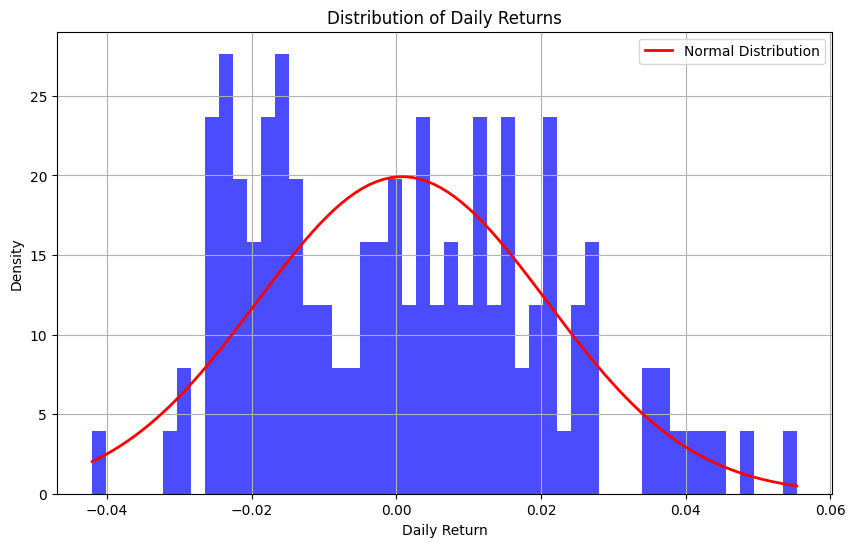

In [179]:
def plot_return_distribution(return_rates, bins=50):
    plt.figure(figsize=(10, 6))
    plt.hist(return_rates, bins=bins, density=True, alpha=0.7, color='blue')
    
    # Calculate and plot the normal distribution for comparison
    mean = np.mean(return_rates)
    std = np.std(return_rates)
    x = np.linspace(min(return_rates), max(return_rates), 100)
    normal_dist = np.exp(-0.5 * ((x - mean) / std) ** 2) / (std * np.sqrt(2 * np.pi))
    plt.plot(x, normal_dist, color='red', linewidth=2, label='Normal Distribution')
    
    plt.xlabel('Daily Return')
    plt.ylabel('Density')
    plt.title('Distribution of Daily Returns')
    plt.legend()
    plt.grid(True)
    plt.savefig("return_distribution.png")
    plt.show()
    plt.close()


plot_return_distribution(simulation_results['return_rates'], bins=50)

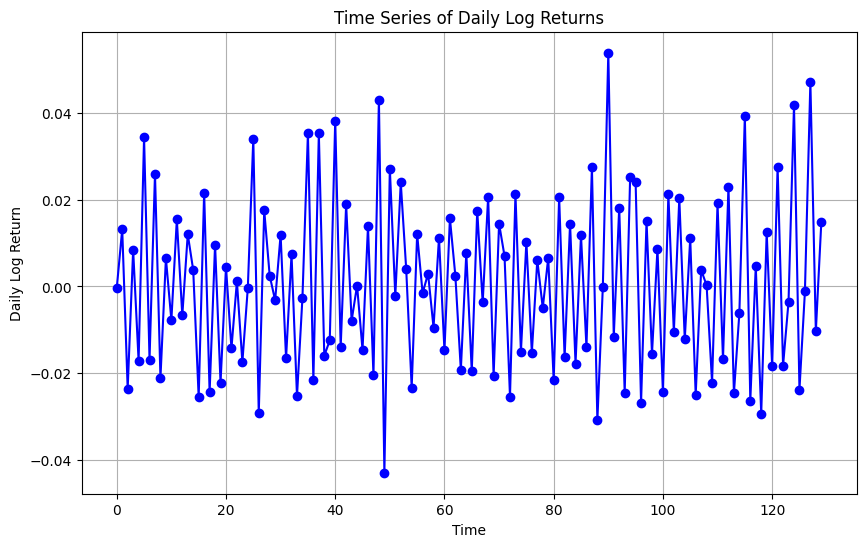

In [180]:
def plot_log_returns(return_rates):
    log_returns = np.log(1 + np.array(return_rates))
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(log_returns)), log_returns, marker='o', linestyle='-', color='blue')
    plt.xlabel('Time')
    plt.ylabel('Daily Log Return')
    plt.title('Time Series of Daily Log Returns')
    plt.grid(True)
    plt.savefig('daily_log_return')
    plt.show()
    plt.close()


plot_log_returns(simulation_results['return_rates'])

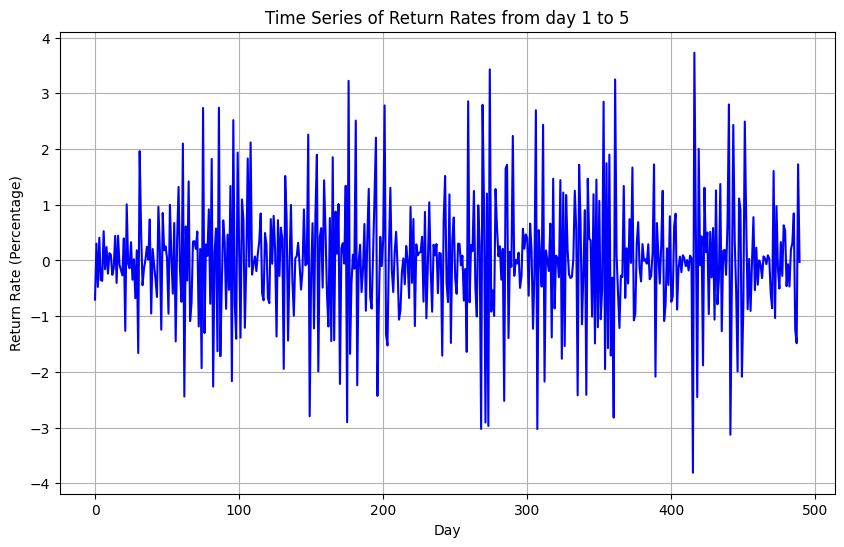

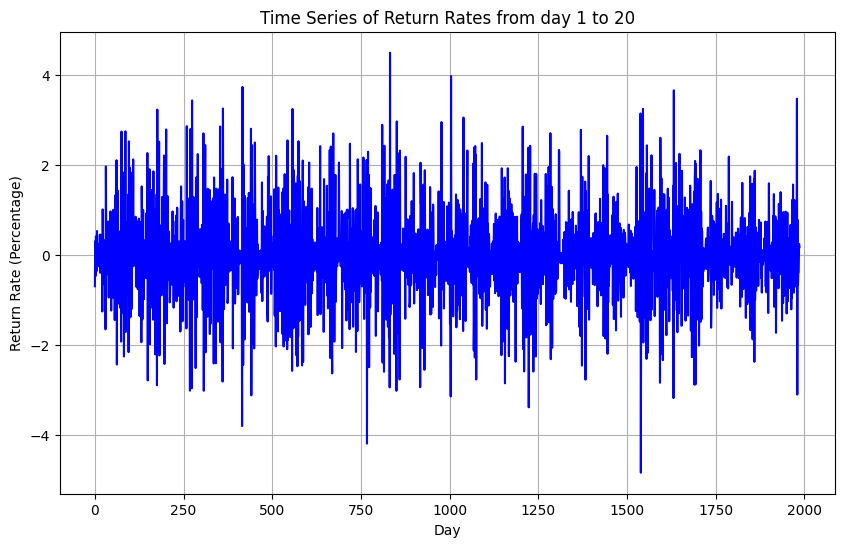

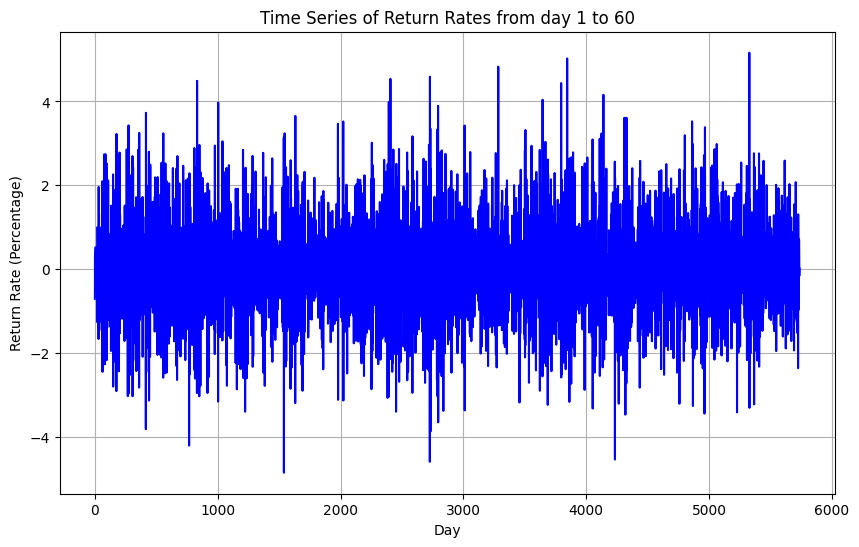

In [192]:
def plot_transaction_return_rates(transaction_returns, start_date=None, end_date=None):
    if start_date is None:
        start_date = 1
    if end_date is None:
        end_date = len(transaction_returns)

    # Flatten the transaction return rates into a single list
    return_rates = []
    for day in range(start_date, end_date+1):
        return_rates.extend(transaction_returns[day])

    plt.figure(figsize=(10, 6))
    plt.plot(range(len(return_rates)), return_rates, linestyle='-', color='blue')
    plt.xlabel('Day')
    plt.ylabel('Return Rate (Percentage)')
    plt.title(f'Time Series of Return Rates from day {start_date} to {end_date}')
    plt.grid(True)
    plt.savefig(f'transaction_returns_{start_date}_{end_date}.png')
    plt.show()
    plt.close()


plot_transaction_return_rates(transaction_return_dict, start_date=1, end_date=5)
plot_transaction_return_rates(transaction_return_dict, start_date=1, end_date=20)
plot_transaction_return_rates(transaction_return_dict, start_date=1, end_date=60)

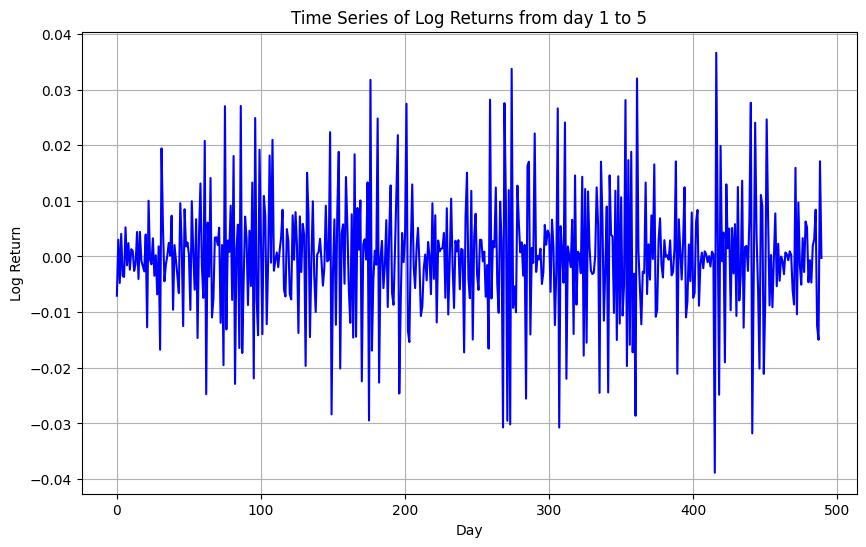

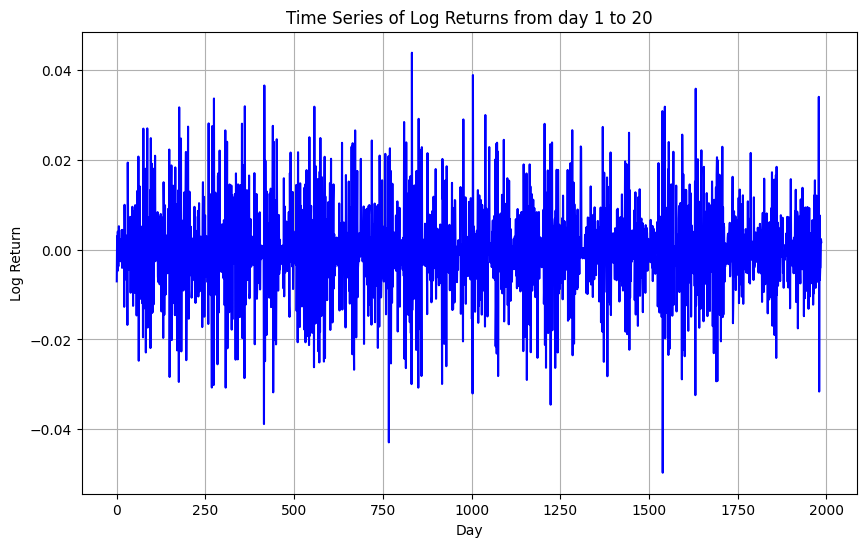

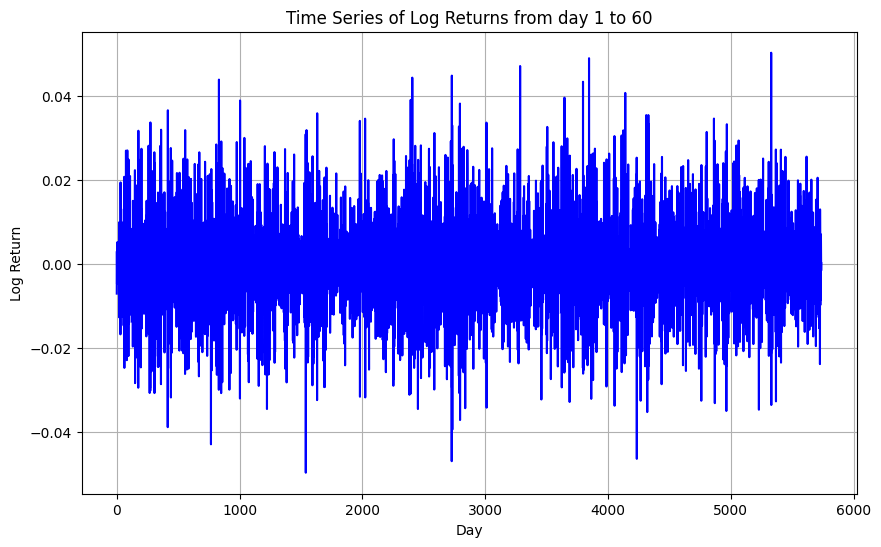

In [193]:
def plot_transaction_log_returns(transaction_returns, start_date=None, end_date=None):
    if start_date is None:
        start_date = 1
    if end_date is None:
        end_date = len(transaction_returns)

    # Flatten the transaction return rates into a single list
    return_rates = []
    for day in range(start_date, end_date+1):
        return_rates.extend(transaction_returns[day])

    log_returns = np.log(1 + np.array(return_rates) / 100)
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(log_returns)), log_returns, linestyle='-', color='blue')
    plt.xlabel('Day')
    plt.ylabel('Log Return')
    plt.title(f'Time Series of Log Returns from day {start_date} to {end_date}')
    plt.grid(True)
    plt.savefig(f'transaction_log_returns_{start_date}_{end_date}.png')
    plt.show()
    plt.close()


plot_transaction_log_returns(transaction_return_dict, start_date=1, end_date=5)
plot_transaction_log_returns(transaction_return_dict, start_date=1, end_date=20)
plot_transaction_log_returns(transaction_return_dict, start_date=1, end_date=60)

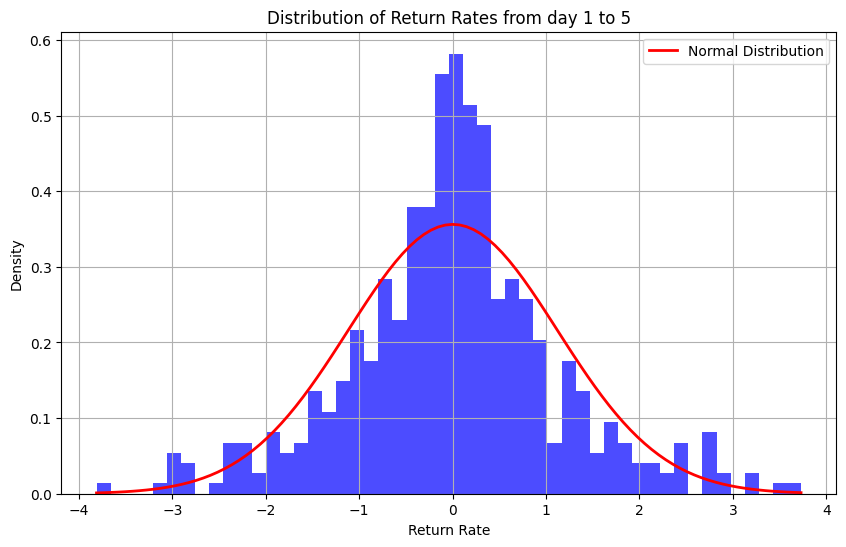

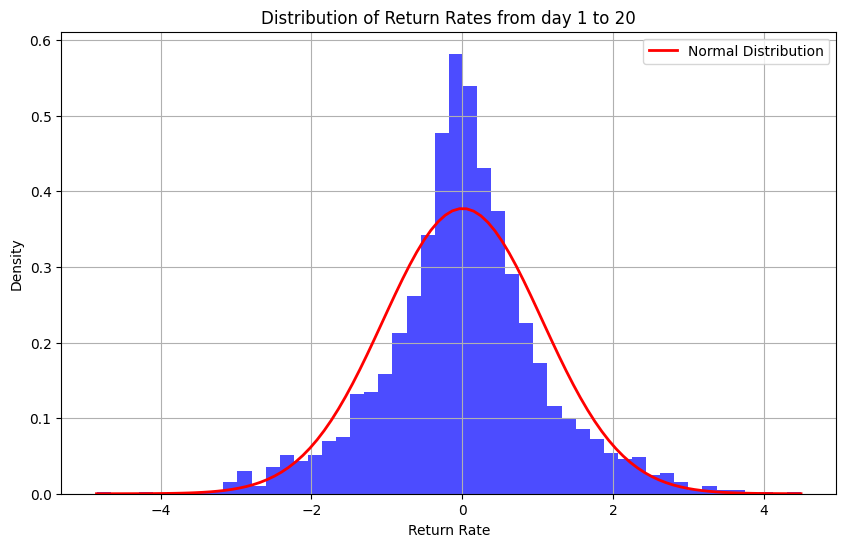

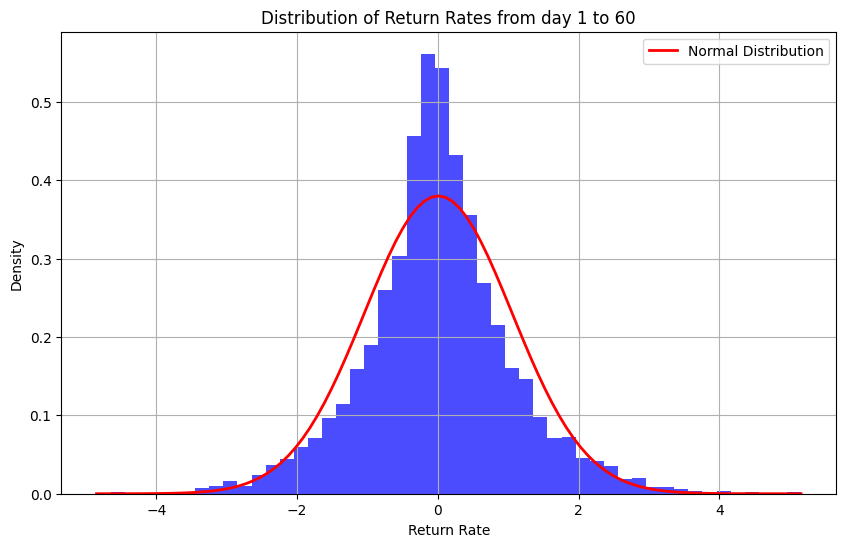

In [194]:
import json
import matplotlib.pyplot as plt
import numpy as np


def plot_transaction_return_distribution(transaction_returns, start_date=None, end_date=None, bins=50):
    if start_date is None:
        start_date = 1
    if end_date is None:
        end_date = len(transaction_returns)

    # Flatten the transaction return rates into a single list
    return_rates = []
    for day in range(start_date, end_date+1):
        return_rates.extend(transaction_returns[day])

    # Calculate and plot the normal distribution for comparison
    mean = np.mean(return_rates)
    std = np.std(return_rates)
    x = np.linspace(min(return_rates), max(return_rates), 100)
    normal_dist = np.exp(-0.5 * ((x - mean) / std) ** 2) / (std * np.sqrt(2 * np.pi))

    plt.figure(figsize=(10, 6))
    plt.plot(x, normal_dist, color='red', linewidth=2, label='Normal Distribution')
    plt.hist(return_rates, bins=bins, density=True, alpha=0.7, color='blue')
    plt.xlabel('Return Rate')
    plt.ylabel('Density')
    plt.title(f'Distribution of Return Rates from day {start_date} to {end_date}')
    plt.grid(True)
    plt.legend()
    plt.savefig(f'transaction_return_distribution_{start_date}_{end_date}.png')
    plt.show()
    plt.close()


plot_transaction_return_distribution(transaction_return_dict, start_date=1, end_date=5)
plot_transaction_return_distribution(transaction_return_dict, start_date=1, end_date=20)
plot_transaction_return_distribution(transaction_return_dict, start_date=1, end_date=60)

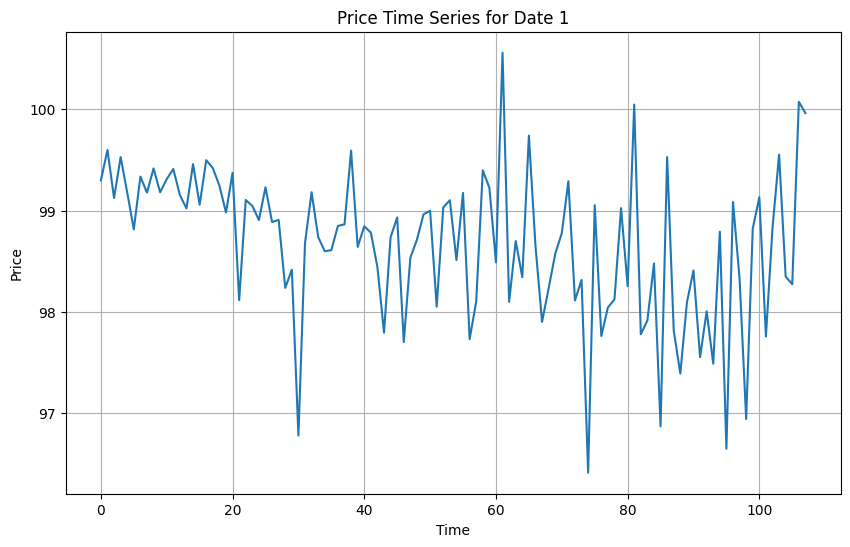

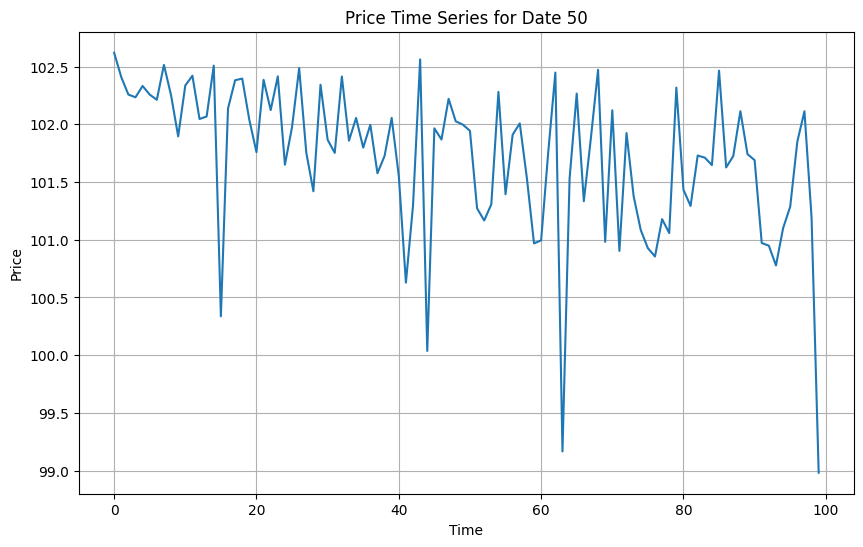

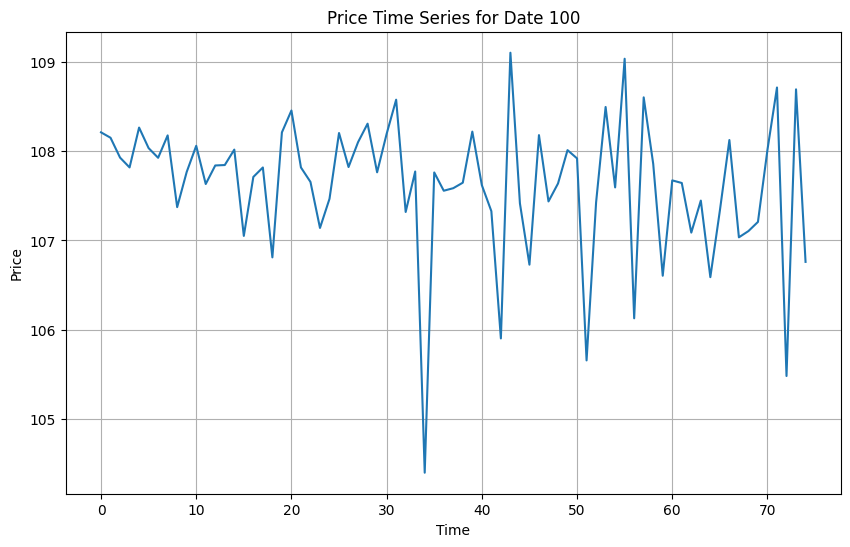

In [196]:
def plot_transaction_price(transaction_price, date):

    prices = transaction_price[date]

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(prices)), prices)
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.title(f'Price Time Series for Date {date}')
    plt.grid(True)
    plt.savefig(f'transaction_price_{date}.png')
    plt.show()
    plt.close()


plot_transaction_price(transaction_price_dict, date=1)
plot_transaction_price(transaction_price_dict, date=50)
plot_transaction_price(transaction_price_dict, date=100)

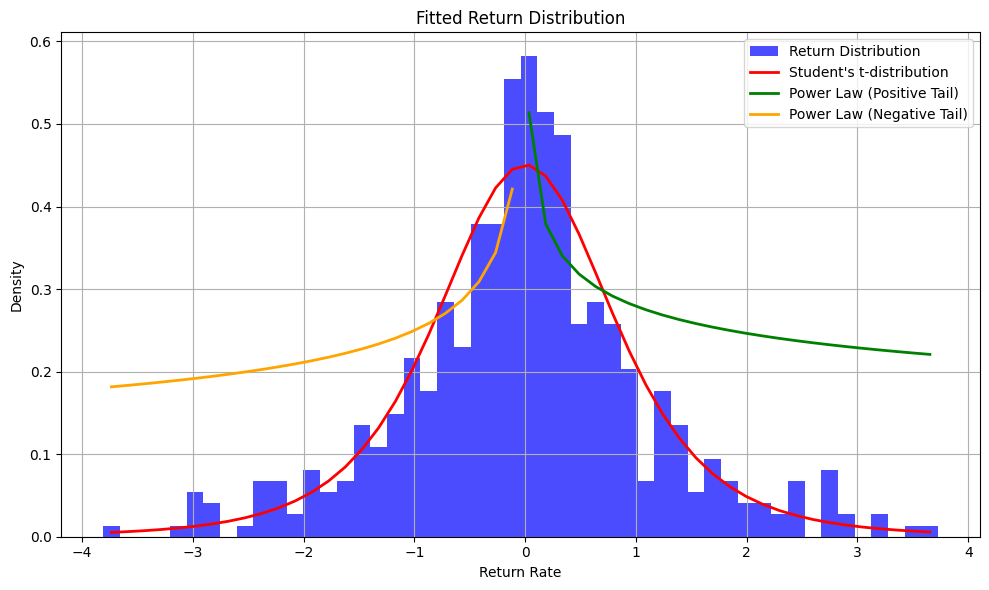

Student's t-distribution:
Degrees of Freedom: 3.87
Location: 0.0004
Scale: 0.8305

Power Law (Positive Tail):
a: 0.2792
b: 0.18

Power Law (Negative Tail):
a: 0.2499
b: 0.24


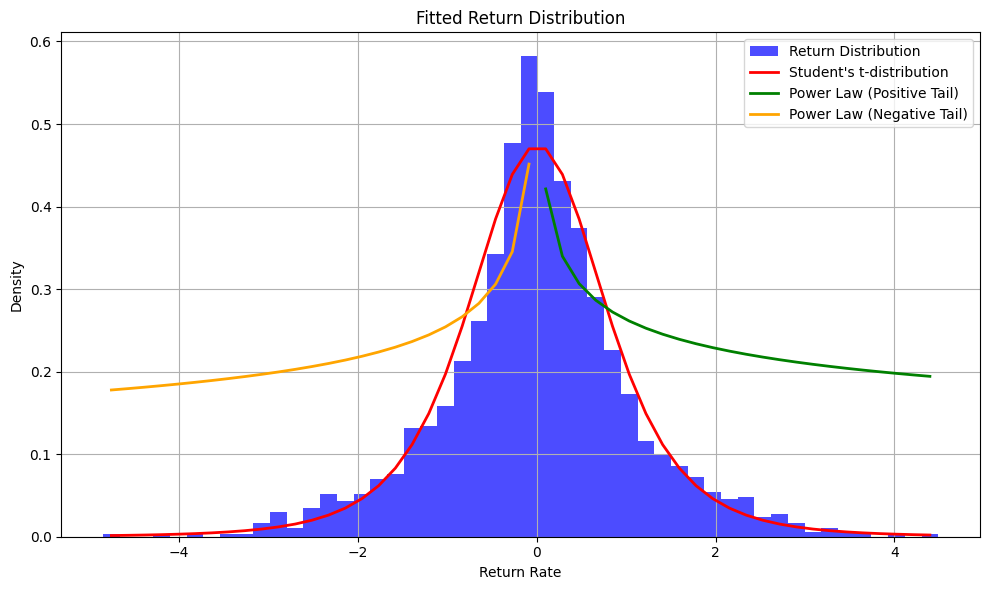

Student's t-distribution:
Degrees of Freedom: 4.06
Location: 0.0071
Scale: 0.7917

Power Law (Positive Tail):
a: 0.2632
b: 0.20

Power Law (Negative Tail):
a: 0.2554
b: 0.23


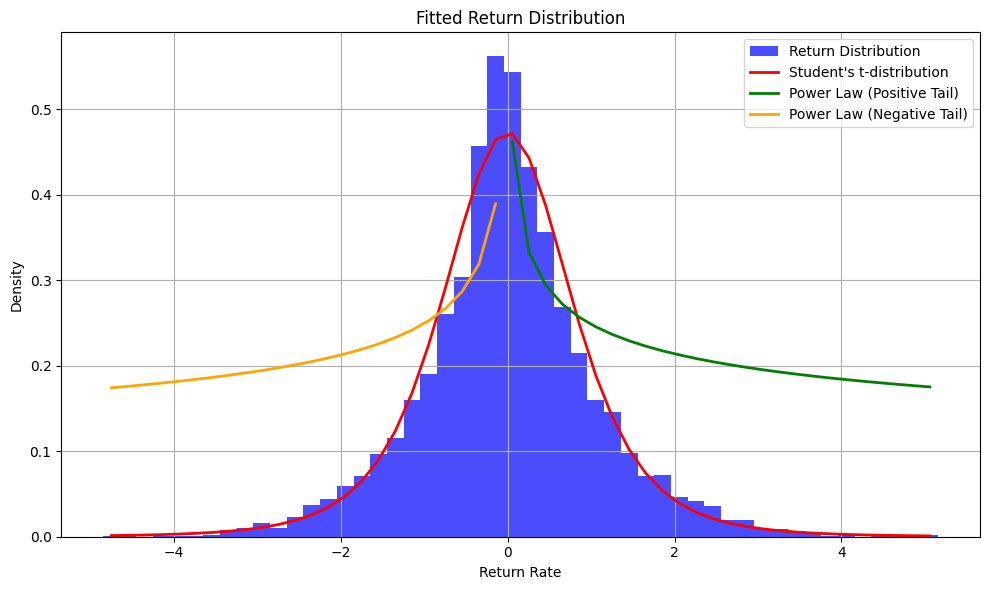

Student's t-distribution:
Degrees of Freedom: 4.27
Location: -0.0058
Scale: 0.7958

Power Law (Positive Tail):
a: 0.2483
b: 0.22

Power Law (Negative Tail):
a: 0.2492
b: 0.23


In [201]:
import numpy as np
import scipy.stats as stats
import scipy.optimize as opt
import matplotlib.pyplot as plt


def fit_return_distribution(transaction_returns, start_date=None, end_date=None, bins=50):

    if start_date is None:
        start_date = 1
    if end_date is None:
        end_date = len(transaction_returns)

    # Flatten the transaction return rates into a single list
    return_rates = []
    for day in range(start_date, end_date+1):
        return_rates.extend(transaction_returns[day])

    # Calculate the histogram of the return rates
    hist, bin_edges = np.histogram(return_rates, bins=bins, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Fit the Student's t-distribution
    df, loc, scale = stats.t.fit(return_rates)
    t_dist = stats.t.pdf(bin_centers, df, loc=loc, scale=scale)
    
    # Fit the power law function
    def power_law(x, a, b):
        return a * np.power(np.abs(x), -b)
    
    pos_returns = [r for r in return_rates if r > 0]
    neg_returns = [r for r in return_rates if r < 0]
    
    if len(pos_returns) > 0:
        pos_hist = np.interp(pos_returns, bin_centers, hist)
        pos_params, _ = opt.curve_fit(power_law, pos_returns, pos_hist)
        pos_power_law = power_law(bin_centers[bin_centers > 0], *pos_params)
    else:
        pos_params = [np.nan, np.nan]
        pos_power_law = np.zeros_like(bin_centers[bin_centers > 0])
    
    if len(neg_returns) > 0:
        neg_hist = np.interp(np.abs(neg_returns), bin_centers, hist)
        neg_params, _ = opt.curve_fit(power_law, np.abs(neg_returns), neg_hist)
        neg_power_law = power_law(np.abs(bin_centers[bin_centers < 0]), *neg_params)
    else:
        neg_params = [np.nan, np.nan]
        neg_power_law = np.zeros_like(bin_centers[bin_centers < 0])
    
    # Plot the fitted curves and the return distribution
    plt.figure(figsize=(10, 6))
    plt.hist(return_rates, bins=bins, density=True, alpha=0.7, color='blue', label='Return Distribution')
    plt.plot(bin_centers, t_dist, color='red', linewidth=2, label="Student's t-distribution")
    plt.plot(bin_centers[bin_centers > 0], pos_power_law, color='green', linewidth=2, label='Power Law (Positive Tail)')
    plt.plot(bin_centers[bin_centers < 0], neg_power_law, color='orange', linewidth=2, label='Power Law (Negative Tail)')
    plt.xlabel('Return Rate')
    plt.ylabel('Density')
    plt.title('Fitted Return Distribution')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'fitted_return_{start_date}_{end_date}.png')
    plt.show()
    plt.close()
    
    print("Student's t-distribution:")
    print(f"Degrees of Freedom: {df:.2f}")
    print(f"Location: {loc:.4f}")
    print(f"Scale: {scale:.4f}")
    
    print("\nPower Law (Positive Tail):")
    print(f"a: {pos_params[0]:.4f}")
    print(f"b: {pos_params[1]:.2f}")
    
    print("\nPower Law (Negative Tail):")
    print(f"a: {neg_params[0]:.4f}")
    print(f"b: {neg_params[1]:.2f}")


fit_return_distribution(transaction_return_dict, start_date=1, end_date=5)
fit_return_distribution(transaction_return_dict, start_date=1, end_date=20)
fit_return_distribution(transaction_return_dict, start_date=1, end_date=60)

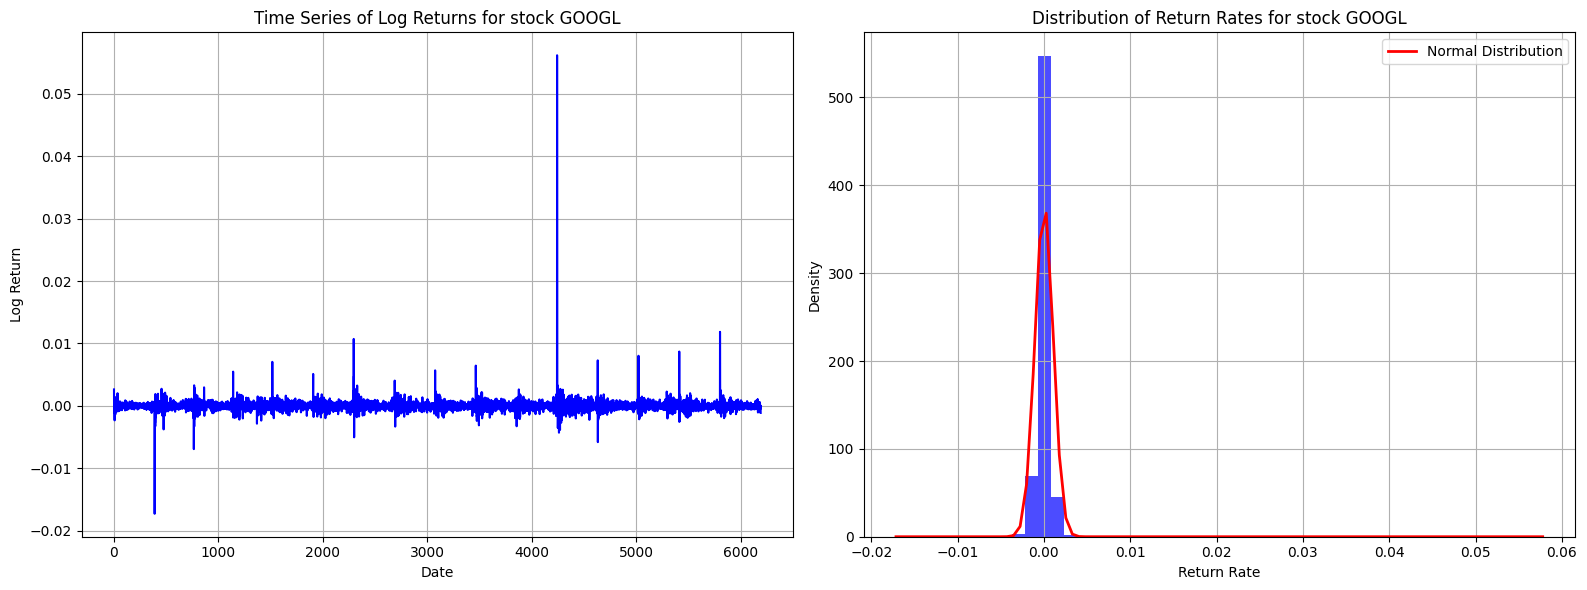

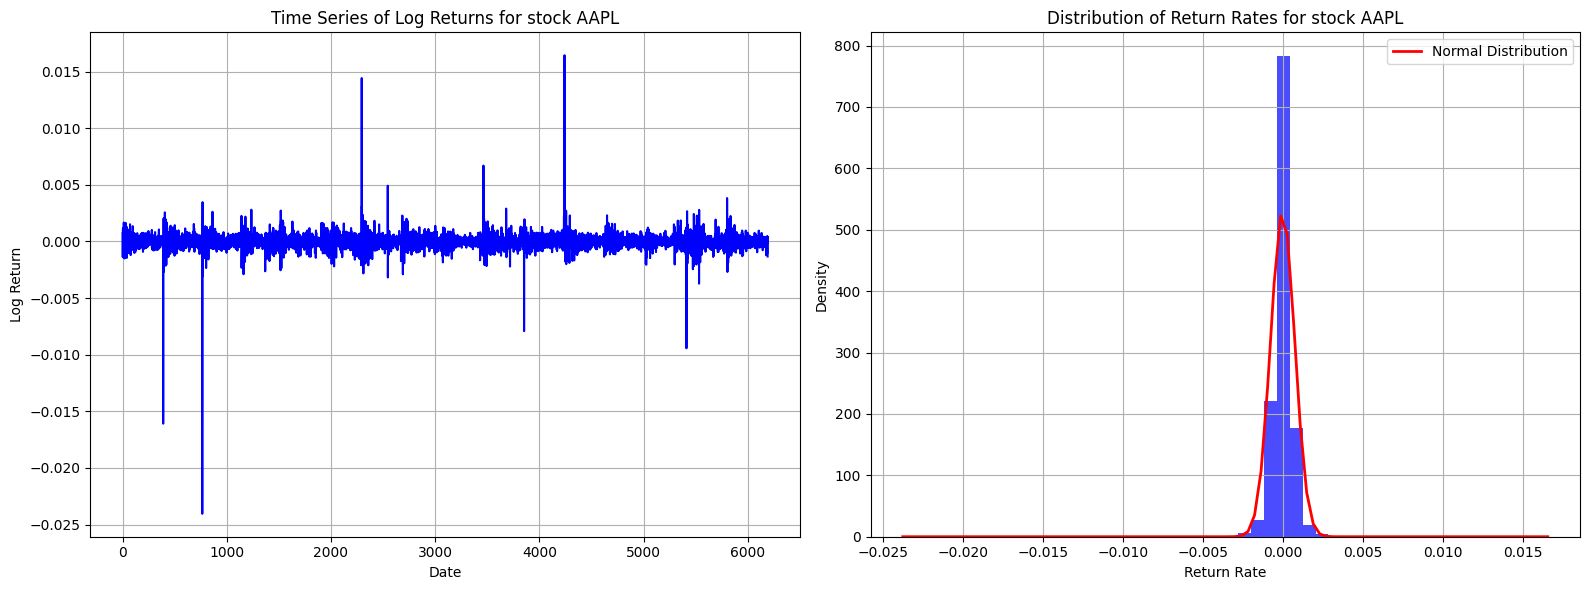

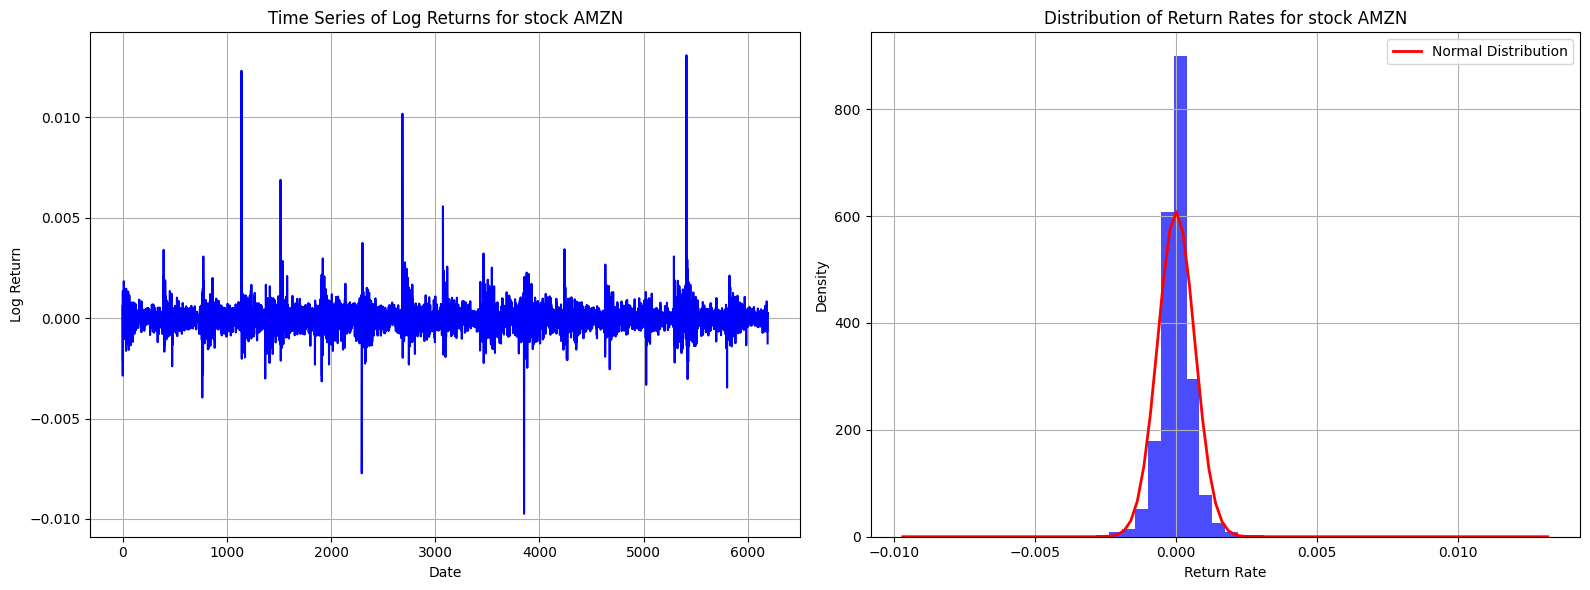

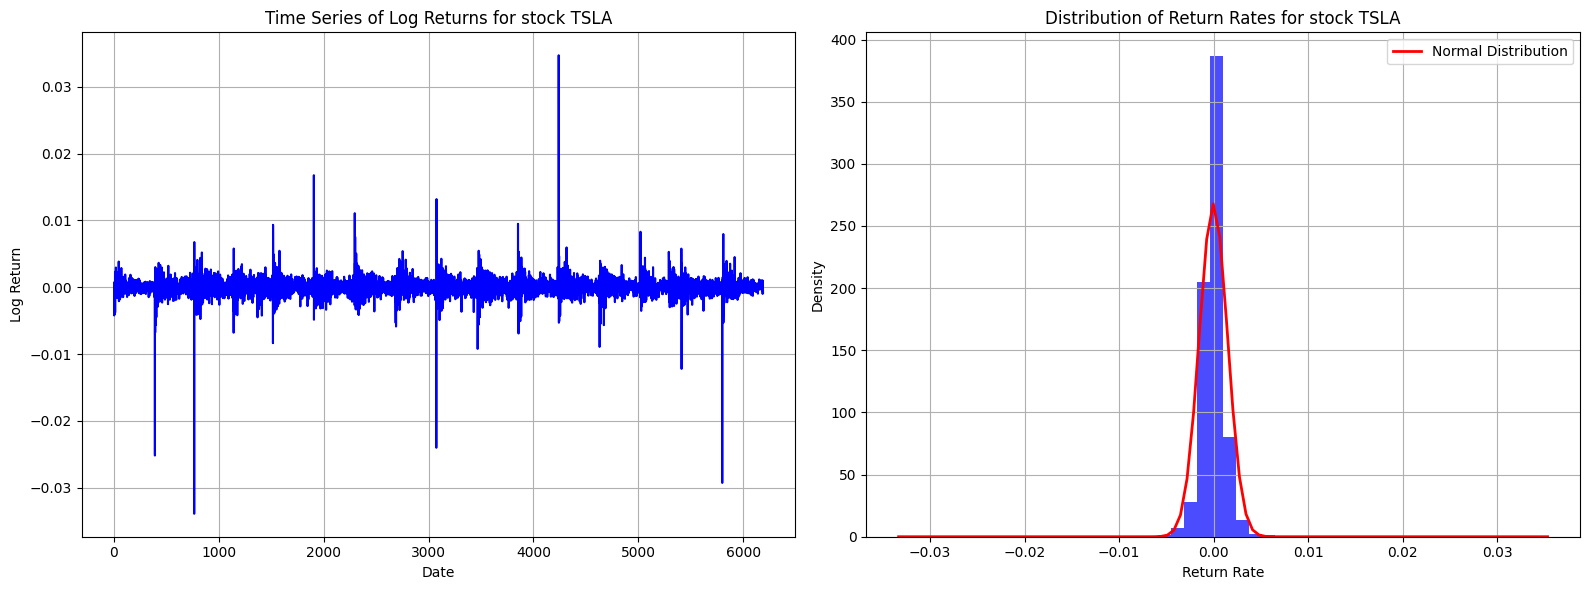

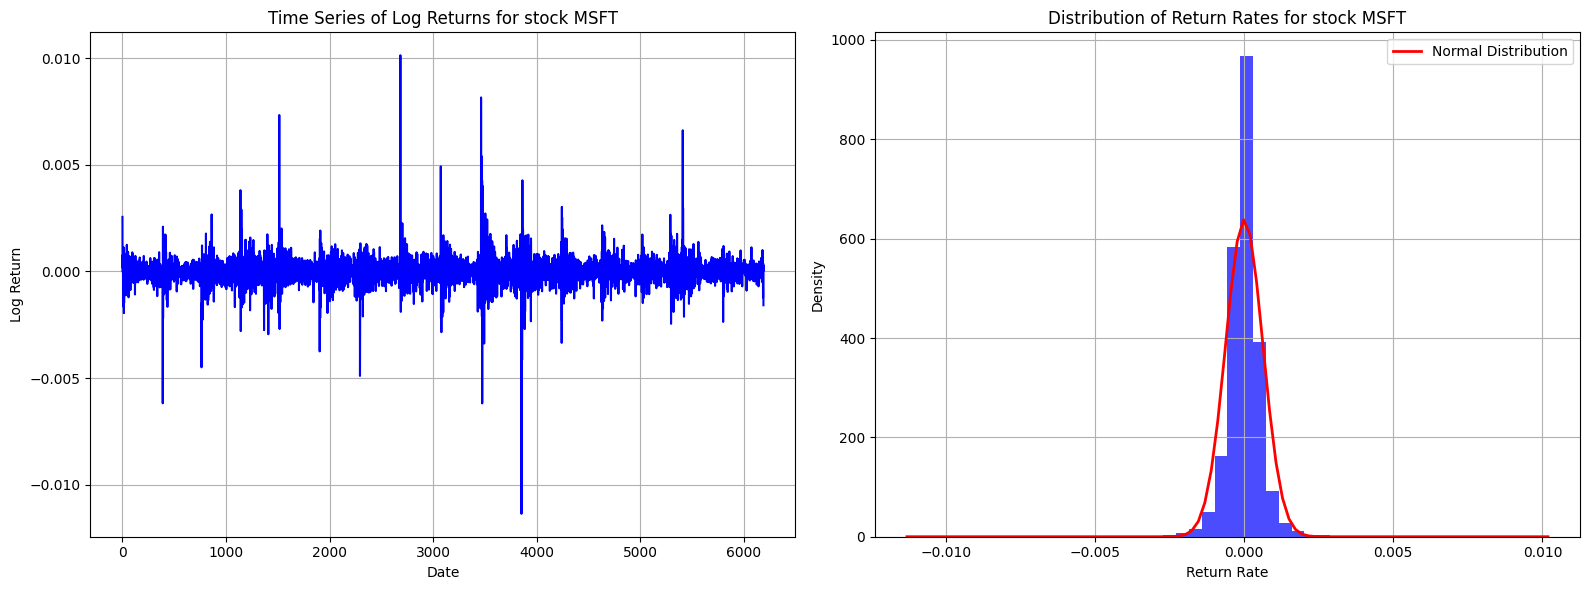

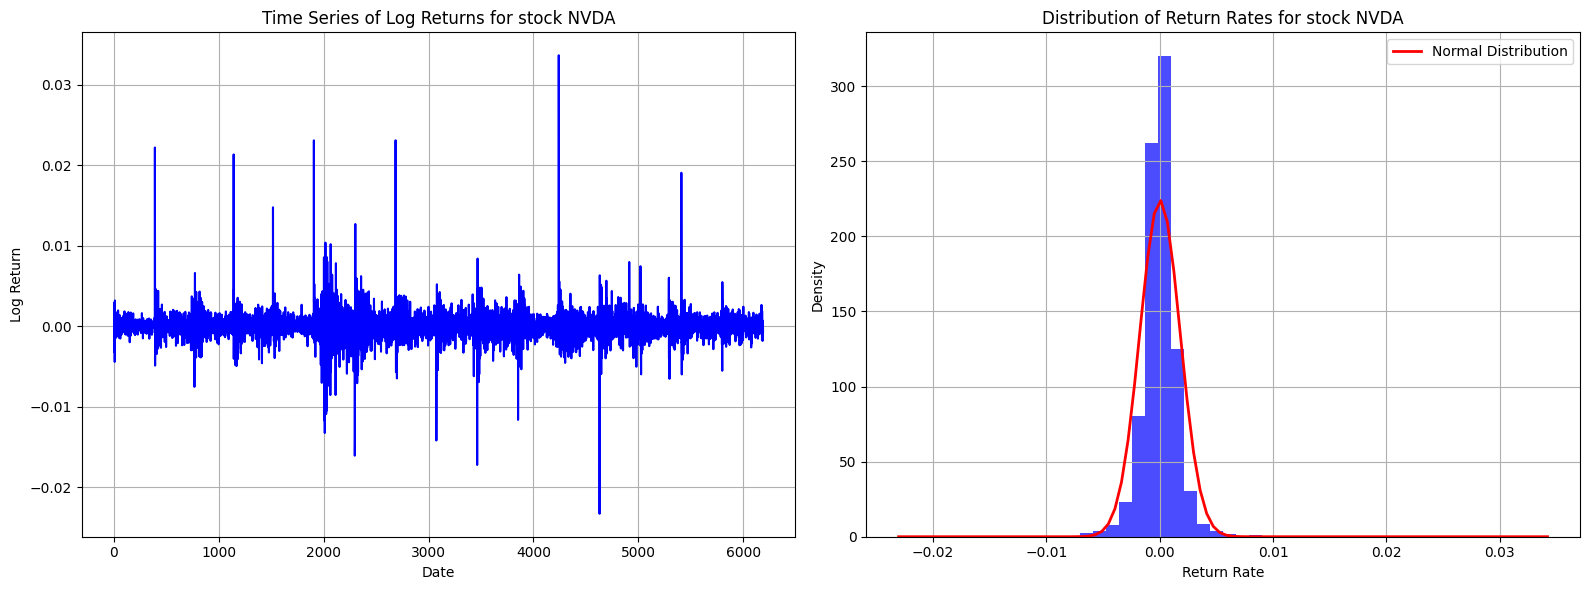

In [203]:
def plot_log_returns_and_distribution_stock(data, stock):
    # Calculate log returns
    data['LogReturn'] = np.log(data['Close'] / data['Close'].shift(1))
    log_returns = data['LogReturn'].dropna()

    # Calculate return rates
    data['ReturnRate'] = data['Close'].pct_change()
    return_rates = data['ReturnRate'].dropna()

    # Create subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # Plot log returns
    ax1.plot(log_returns.index, log_returns, linestyle='-', color='blue')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Log Return')
    ax1.set_title(f'Time Series of Log Returns for stock {stock}')
    ax1.grid(True)

    # Plot return distribution
    mean = return_rates.mean()
    std = return_rates.std()
    x = np.linspace(return_rates.min(), return_rates.max(), 100)
    normal_dist = np.exp(-0.5 * ((x - mean) / std) ** 2) / (std * np.sqrt(2 * np.pi))
    ax2.plot(x, normal_dist, color='red', linewidth=2, label='Normal Distribution')
    ax2.hist(return_rates, bins=50, density=True, alpha=0.7, color='blue')
    ax2.set_xlabel('Return Rate')
    ax2.set_ylabel('Density')
    ax2.set_title(f'Distribution of Return Rates for stock {stock}')
    ax2.grid(True)
    ax2.legend()

    plt.tight_layout()
    plt.savefig(f'log_returns_and_distribution_{stock}.png')
    plt.show()
    plt.close()


# Define the stock symbols
stocks = ["GOOGL", "AAPL", "AMZN", "TSLA", "MSFT", "NVDA"]

# Download the data for each stock
for stock in stocks:
    stock_data = pd.read_csv(f"{stock}_march_2024_intraday.csv")
    plot_log_returns_and_distribution_stock(stock_data, stock=stock)